**Redes Neuronales Multiclase Imagenes**

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from datetime import datetime, timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
from keras.models import load_model

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import set_config

print("Módulos y clases importados")

Módulos y clases importados


**1. Diseñar un Modelo de Redes Neuronales (para un problema de clasificación de imágenes multiclase) en un cuaderno de Jupyter notebook con Python con los siguientes pasos:**

**1.1	Descripción del problema y dataset, número imágenes, indicar las dimensiones, cantidad de clases o etiquetas.**

Descripcion del conjunto de datos:


*   Número de imágenes: El conjunto de datos contiene un total de 60.000 imágenes a color
*   Dimensiones de las imágenes: Todas las imágenes tienen un tamaño de 32x32 píxeles.
* Número de clases: Hay 10 clases diferentes en el conjunto de datos.
* Número de imágenes por clase: Cada clase contiene 6.000 imágenes.
* División de los datos: Los datos están divididos en 50,000 imágenes de entrenamiento y 10,000 imágenes de prueba.
* Divisiones específicas:
Hay cinco lotes de entrenamiento, cada uno con 10,000 imágenes, y un lote de prueba con 10,000 imágenes.
El lote de prueba contiene 1,000 imágenes seleccionadas al azar de cada clase.
Los lotes de entrenamiento contienen las imágenes restantes, con un total de 5,000 imágenes de cada clase distribuidas entre los lotes.
* Mutuamente excluyentes: Las clases son completamente mutuamente excluyentes, una imagen solo puede pertenecer a una clase.

Clases en el conjunto de datos:

* Avión
* Automóvil
* Pájaro
* Gato
* Ciervo
* Perro
* Rana
* Caballo
* Barco
* Camión



Cargado de esta forma, cada uno de los archivos por lotes contiene un diccionario con los siguientes elementos:

datos: una gran variedad de uint8 de 10000x3072. Cada fila de la matriz almacena una imagen en color de 32x32. Las primeras 1024 entradas contienen los valores del canal rojo, las 1024 siguientes el verde y las 1024 finales el azul. La imagen se almacena en orden de fila principal, de modo que las primeras 32 entradas de la matriz sean los valores del canal rojo de la primera fila de la imagen.

etiquetas: una lista de 10000 números en el rango del 0 al 9. El número en el índice i indica la etiqueta de la iésima imagen en los datos de la matriz.

In [ ]:
!pip install opencv-python
import cv2 as cv
import tarfile
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
print('importadas')

importadas


In [ ]:
#Funciones para guardar y cargar la Red Neuronal (Arquitectura y Pesos)
def guardarNN(model,nombreArchivo):
    print("Guardando Red Neuronal en Archivo")
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Grabada en Archivo")

def cargarNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')
    print("Red Neuronal Cargada desde Archivo")
    return model

In [ ]:
#Para cargar el Dataset desde la web
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Dataset Cargado')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Dataset Cargado


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
# Normalizar los valores de píxeles entre 0 y 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_trainReshapeImageRow=X_train.reshape((X_train.shape[0],3072))
print(X_trainReshapeImageRow.shape)
X_testReshapeImageRow=X_test.reshape((X_test.shape[0],3072))
print(X_testReshapeImageRow.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
X_trainReshapeImageRow[0].shape

(3072,)

In [ ]:
x_train=X_trainReshapeImageRow
x_test=X_testReshapeImageRow

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)


1.2	**Realizar análisis exploratorio de imágenes: con una función visualizar una imagen o varias imágenes, indicar sus dimensiones y su clase o etiqueta.**  

In [ ]:
import cv2 as cv                  # open vision library OpenCV

def _load_label_names():
    """
    Load the label names from file
    """
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_stats(sample_id):
    """
    Display Stats of the the dataset
    """
    features, labels = X_trainReshapeImageRow, y_train

    print('Samples (cantidad de imágenes): {}'.format(len(features)))
    print('Cantidad de Etiquetas: {}'.format(dict(zip(*np.unique(labels, return_counts=True)))))
    #print('Primeras 20 Etiquetas: {}'.format(labels[:20]))

    sample_image = features[sample_id]
    sample_label = labels[sample_id][0]
    label_names = _load_label_names()

    print('\nImagen {}:'.format(sample_id))
    print('Imagen - Valor Min: {} Valor Max: {}'.format(sample_image.min(), sample_image.max()))
    print('Imagen - Shape: {}'.format(sample_image.shape))
    print('Etiqueta - Etiqueta Id: {} Nombre: {}'.format(sample_label, label_names[sample_label]))
    #plt.axis('off')
    imagen=sample_image.reshape(32, 32, 3)#.transpose(1, 2, 0)
    plt.imshow(imagen)
    cv.imwrite('imagen.jpg', imagen)

def display_images_with_stats(sample_ids, X_train, y_train, label_names):
    """
    Display images along with their dimensions and labels
    """
    num_samples = len(X_train)

    for sample_id in sample_ids:
        if sample_id >= num_samples:
            print(f"Sample ID {sample_id} fuera del rango de muestras.")
            continue

        sample_image = X_train[sample_id]
        sample_label = y_train[sample_id][0]

        print('\nImagen {}:'.format(sample_id))
        print('Dimensiones de la imagen - Alto: {} Ancho: {} Canales: {}'.format(sample_image.shape[0], sample_image.shape[1], sample_image.shape[2]))
        print('Etiqueta - Etiqueta Id: {} Nombre: {}'.format(sample_label, label_names[sample_label]))

        plt.imshow(sample_image)
        plt.axis('off')
        plt.show()

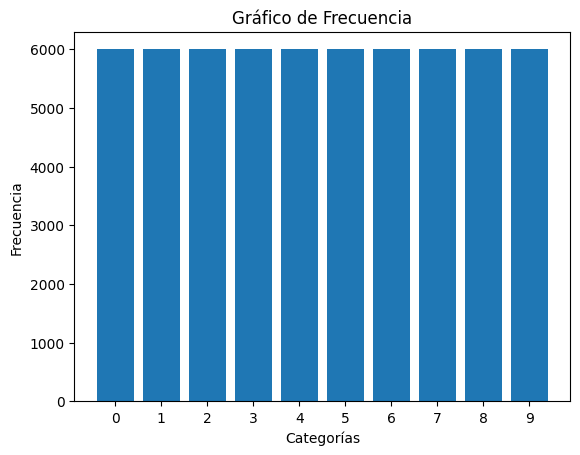

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
Y=y_train.flatten().tolist()
Y.extend(y_test.flatten().tolist())

# Utiliza Counter para contar las frecuencias de los elementos en la lista
frecuencias = Counter(Y)

# Separa las claves (elementos) y los valores (frecuencias) en listas separadas
elementos = list(frecuencias.keys())
frecuencias = list(frecuencias.values())

# Crea un gráfico de barras
plt.bar(elementos, frecuencias)

# Etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencia')

# Establece las etiquetas del eje X
plt.xticks(elementos)

# Muestra el gráfico
plt.show()

Samples (cantidad de imágenes): 50000
Cantidad de Etiquetas: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}

Imagen 1783:
Imagen - Valor Min: 0.0196078431372549 Valor Max: 0.9529411764705882
Imagen - Shape: (3072,)
Etiqueta - Etiqueta Id: 7 Nombre: horse


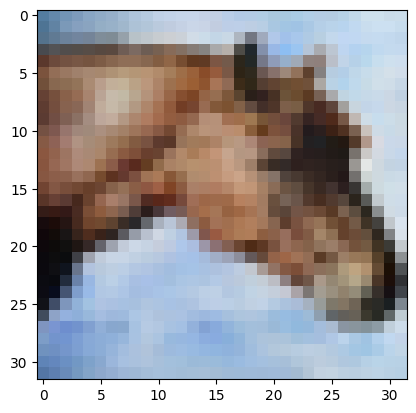

In [ ]:
sample_id = 1783
display_stats(sample_id)


Imagen 100:
Dimensiones de la imagen - Alto: 32 Ancho: 32 Canales: 3
Etiqueta - Etiqueta Id: 8 Nombre: ship


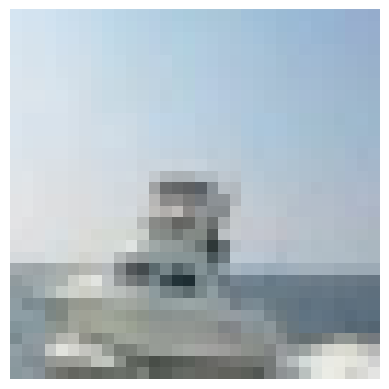


Imagen 200:
Dimensiones de la imagen - Alto: 32 Ancho: 32 Canales: 3
Etiqueta - Etiqueta Id: 6 Nombre: frog


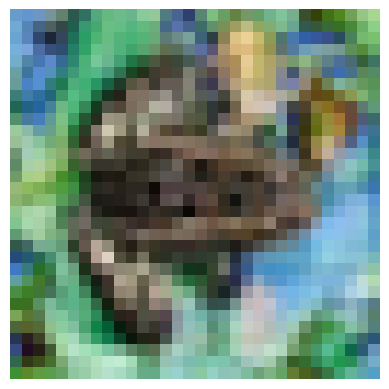


Imagen 300:
Dimensiones de la imagen - Alto: 32 Ancho: 32 Canales: 3
Etiqueta - Etiqueta Id: 2 Nombre: bird


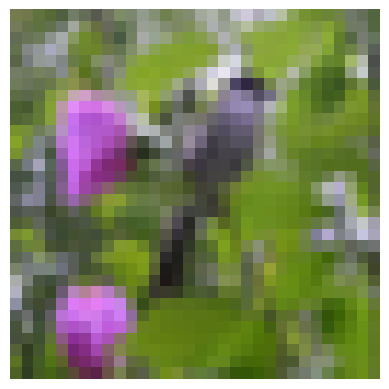


Imagen 400:
Dimensiones de la imagen - Alto: 32 Ancho: 32 Canales: 3
Etiqueta - Etiqueta Id: 2 Nombre: bird


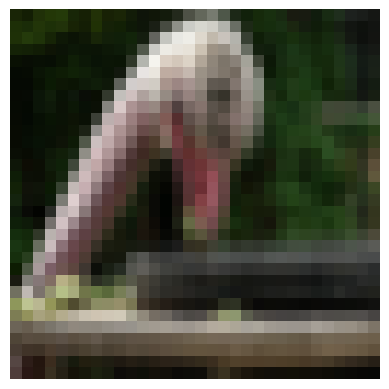

In [ ]:
label_names = _load_label_names()
sample_ids_to_display = [100, 200, 300, 400]
display_images_with_stats(sample_ids_to_display, X_train, y_train, label_names)

1.3	**Desarrollar, entrenar y optimizar una red neuronal para clasificación multiclase**

*Entrenamiento base de una red neuronal*

In [ ]:
# Proceso Clasificación con Red Neuronal


import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
#en la última capa tiene que haber tantas neuronas como clases haya, en este caso 10
model.add(Dense(10, activation='softmax'))

#compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

size_batch = 350
epocas = 15
history = model.fit(x_train, y_train, batch_size= size_batch, epochs=epocas, verbose=1)
# Evaluación del modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('\nTest accuracy:', test_acc)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1866 - loss: 2.1679
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2947 - loss: 1.9119
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3190 - loss: 1.8573
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3328 - loss: 1.8199
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3477 - loss: 1.7927
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3540 - loss: 1.7708
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3681 - loss: 1.7402
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3755 - loss: 1.7377
Epoch 9/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3777 - loss: 1.7212
Epoch 10/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3868 - loss: 1.7107
Epoch 11/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3891 - loss: 1.7040
Epoch 12/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#Predicciones
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)
y_pred = y_pred.flatten()
y_test2 = y_test.flatten()
print(y_pred)
print(y_test2)
dataframeFinal=pd.DataFrame({'real':y_test2, 'predicción': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1 8 8 ... 5 5 7]
[3 8 8 ... 5 1 7]


,real,predicción
0,3,1
1,8,8
2,8,8
3,0,0
4,6,4
5,6,6
6,1,3
7,6,6
8,3,2
9,1,1


Mean Absolute Error (MAE): 2.0796
Mean Squared Error (MSE): 10.8354
Root Mean Squared Error (RMSE): 3.2917
Accuracy: 0.4256
Precision:  0.4215
Recall:  0.4256
F1: 0.4194


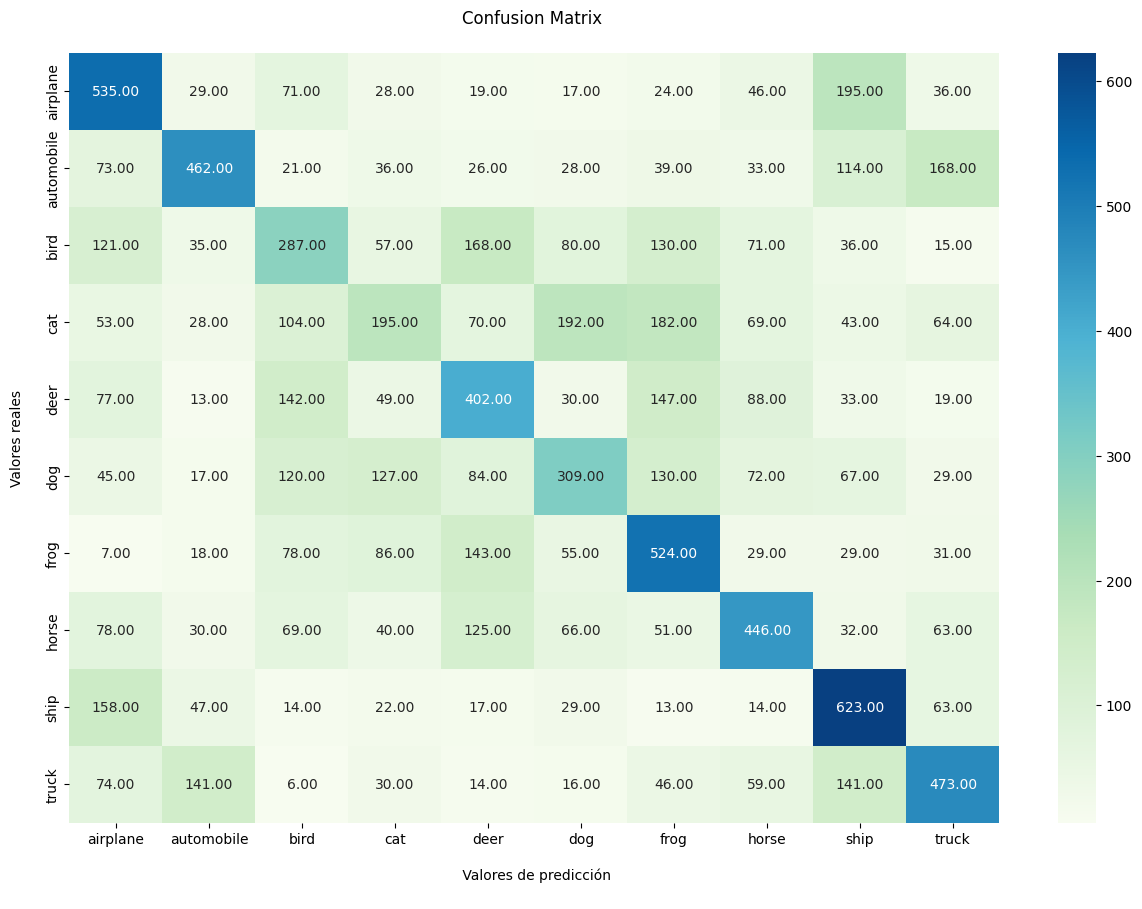

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib import*
from matplotlib.cm import register_cmap
import matplotlib.pyplot as plt

MAE=metrics.mean_absolute_error(y_test2, y_pred)
MSE=metrics.mean_squared_error(y_test2, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test2, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE)

accuracyModeloBase=str(accuracy_score(y_test2,y_pred))
print('Accuracy: ' + accuracyModeloBase)

precision=precision_score(y_test2,y_pred, average='weighted')#average one of [None, 'micro', 'macro', 'weighted']
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_test2,y_pred, average='weighted')
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_test2,y_pred, average='weighted')
f1=str(round(f1, 4))
print('F1:',f1)


plt.figure(figsize=(15,10))
fx=sns.heatmap(confusion_matrix(y_test2,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Valores de predicción\n')
fx.set_ylabel('Valores reales\n');
fx.xaxis.set_ticklabels(_load_label_names())
fx.yaxis.set_ticklabels(_load_label_names())
plt.show()

In [ ]:
guardarNN(model,'modeloRedNeuronalBase')
print('Modelo Base Guardado')

Guardando Red Neuronal en Archivo
Red Neuronal Grabada en Archivo
Modelo Base Guardado


**Optimización del modelo de red neuronal (Fine Tuning)**

*Optimización – Paso 1. Parámetros de compilación*

In [ ]:
#Función para convertir el tiempo de segundos al formato de días, horas, minutos y segundos.
def GetTime(gs_time):
    sec=timedelta(seconds=gs_time)
    d = datetime(1,1,1) + sec
    tiempoTotal=("%d días: %d horas: %d min: %d seg" % (d.day-1, d.hour, d.minute, d.second))
    return tiempoTotal

In [ ]:
import time

# Define la función que construye el modelo
def build_model():
    model = Sequential()
    model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define los valores que deseas probar para los parámetros
batch_size = [100, 250, 300]
epochs = [10, 15, 20]
optimizer = ['Adam', 'SGD', 'Adagrad']

# Define el diccionario de parámetros
parameters = {
    'batch_size': batch_size,
    'epochs': epochs,
    'optimizer': optimizer
}

# Crea un estimador KerasClassifier
estimator = KerasClassifier(model=build_model, verbose=1)

# Ajusta el GridSearchCV con los datos de entrada
tic = time.time()

# Crea una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=2, n_jobs=-1, error_score='raise')
grid_result = grid_search.fit(x_train, y_train)  # Asegúrate de reemplazar x_train e y_train con tus datos reales

# Imprime los mejores parámetros encontrados
print(grid_result.best_params_)


gs_time = time.time() - tic
print('Tiempo en segundos: ',gs_time)

tiempoTotal=GetTime(gs_time)
print('Tiempo: ',tiempoTotal)

gs1=grid_result


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1748 - loss: 2.2599
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2811 - loss: 1.9677
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3178 - loss: 1.8909
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3383 - loss: 1.8406
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3521 - loss: 1.8150
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3619 - loss: 1.7801
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3666 - loss: 1.7561
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3790 - loss: 1.7348
Epoch 9/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3862 - loss: 1.7168
Epoch 10/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3909 - loss: 1.7018
Epoch 11/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3971 - loss: 1.6935
Epoch 12/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms

In [ ]:
estimator.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])

In [ ]:
print("Best: %f using %s" % (gs1.best_score_, gs1.best_params_))

Best: 0.387320 using {'batch_size': 300, 'epochs': 20, 'optimizer': 'Adam'}


In [ ]:
means = gs1.cv_results_['mean_test_score']
stds = gs1.cv_results_['std_test_score']
params = gs1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.354060 (0.003620) with: {'batch_size': 100, 'epochs': 10, 'optimizer': 'Adam'}
0.346700 (0.036500) with: {'batch_size': 100, 'epochs': 10, 'optimizer': 'SGD'}
0.368860 (0.019940) with: {'batch_size': 100, 'epochs': 10, 'optimizer': 'Adagrad'}
0.356580 (0.004180) with: {'batch_size': 100, 'epochs': 15, 'optimizer': 'Adam'}
0.363080 (0.038880) with: {'batch_size': 100, 'epochs': 15, 'optimizer': 'SGD'}
0.371060 (0.037940) with: {'batch_size': 100, 'epochs': 15, 'optimizer': 'Adagrad'}
0.323560 (0.029040) with: {'batch_size': 100, 'epochs': 20, 'optimizer': 'Adam'}
0.357560 (0.044560) with: {'batch_size': 100, 'epochs': 20, 'optimizer': 'SGD'}
0.323360 (0.008120) with: {'batch_size': 100, 'epochs': 20, 'optimizer': 'Adagrad'}
0.355540 (0.002780) with: {'batch_size': 250, 'epochs': 10, 'optimizer': 'Adam'}
0.351080 (0.010600) with: {'batch_size': 250, 'epochs': 10, 'optimizer': 'SGD'}
0.352180 (0.025260) with: {'batch_size': 250, 'epochs': 10, 'optimizer': 'Adagrad'}
0.368620 (0.011980) 

*Optimización – Paso 2. Densidad de las capas de neuronas y regularización de Dropout*


In [ ]:
from time import time as t

# Define la función para construir el modelo
def build_model(l1, l2, dr):
    model = Sequential()
    model.add(Dense(l1, input_shape=(x_train.shape[1],), activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(l2, activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])
    return model

l1 = [16, 32, 64]
l2 = [16, 32, 64]
dr = [0, 0.2, 0.35, 0.5]

# Define los parámetros que deseas buscar
parameters = {
    'model__l1': l1,
    'model__l2': l2,
    'model__dr': dr
}

# Crea una instancia de KerasClassifier utilizando tu función de construcción de modelo
estimator = KerasClassifier(build_fn=build_model, verbose=0, batch_size=300, epochs=20)

tic = t()

# Realiza la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=2, n_jobs=-1)
grid_result = grid_search.fit(x_train, y_train)

gs_time1 = t() - tic
print('Tiempo en segundos:', gs_time1)
tiempoTotal=GetTime(gs_time1)
print('Tiempo: ',tiempoTotal)

gs2=grid_result

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inst

Tiempo en segundos: 1780.4308030605316
Tiempo:  0 días: 0 horas: 29 min: 40 seg


In [ ]:
print("Best: %f using %s" % (gs2.best_score_, gs2.best_params_))

Best: 0.428500 using {'model__dr': 0, 'model__l1': 64, 'model__l2': 64}


In [ ]:
means = gs2.cv_results_['mean_test_score']
stds = gs2.cv_results_['std_test_score']
params = gs2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.227200 (0.127200) with: {'model__dr': 0, 'model__l1': 16, 'model__l2': 16}
0.260640 (0.003320) with: {'model__dr': 0, 'model__l1': 16, 'model__l2': 32}
0.346480 (0.004360) with: {'model__dr': 0, 'model__l1': 16, 'model__l2': 64}
0.379220 (0.003220) with: {'model__dr': 0, 'model__l1': 32, 'model__l2': 16}
0.350400 (0.041440) with: {'model__dr': 0, 'model__l1': 32, 'model__l2': 32}
0.402860 (0.016820) with: {'model__dr': 0, 'model__l1': 32, 'model__l2': 64}
0.393660 (0.009660) with: {'model__dr': 0, 'model__l1': 64, 'model__l2': 16}
0.410520 (0.004240) with: {'model__dr': 0, 'model__l1': 64, 'model__l2': 32}
0.428500 (0.005220) with: {'model__dr': 0, 'model__l1': 64, 'model__l2': 64}
0.189140 (0.001980) with: {'model__dr': 0.2, 'model__l1': 16, 'model__l2': 16}
0.144440 (0.044440) with: {'model__dr': 0.2, 'model__l1': 16, 'model__l2': 32}
0.249280 (0.058480) with: {'model__dr': 0.2, 'model__l1': 16, 'model__l2': 64}
0.282200 (0.036840) with: {'model__dr': 0.2, 'model__l1': 32, 'model__

*Presentación de resultados*

In [ ]:
cv_results= pd.DataFrame(gs2.cv_results_)
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__dr,param_model__l1,param_model__l2,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,36.312438,0.359480,3.092209,0.618122,0,16,16,"{'model__dr': 0, 'model__l1': 16, 'model__l2':...",0.35440,0.10000,0.22720,0.12720,19
1,34.269560,0.576507,2.070892,0.554020,0,16,32,"{'model__dr': 0, 'model__l1': 16, 'model__l2':...",0.26396,0.25732,0.26064,0.00332,15
2,34.692596,2.877435,2.481086,0.235054,0,16,64,"{'model__dr': 0, 'model__l1': 16, 'model__l2':...",0.35084,0.34212,0.34648,0.00436,10


In [ ]:
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results=cv_results[["mean_test_score", "std_test_score",
            "param_model__l1",
            "param_model__l2"
            ]]
cv_results.head(3)

,mean_test_score,std_test_score,param_model__l1,param_model__l2
8,0.42850,0.00522,64,64
7,0.41052,0.00424,64,32
5,0.40286,0.01682,32,64


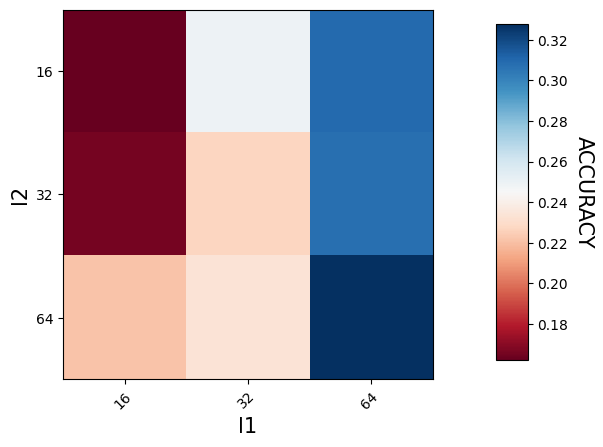

In [ ]:
def make_heatmap(ax, gs, is_sh=False, make_cbar=False, cmap='GnBu'):
    results=cv_results
    scores_matrix = pd.pivot_table(data=cv_results.sort_values('mean_test_score', ascending=False),
                                   index='param_model__l2',
                                   columns='param_model__l1',
                                   values='mean_test_score')
    im = ax.imshow(scores_matrix, cmap=cmap)
    z=results['mean_test_score']
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()
    ax.set_xticks(np.arange(len(l1)))
    ax.set_xticklabels([x for x in l1])
    ax.set_xlabel('l1', fontsize=15)
    ax.set_yticks(np.arange(len(l2)))
    ax.set_yticklabels([x for x in l2])
    ax.set_ylabel('l2', fontsize=15)
    # Para girar las etiquetas de las marcas y establecer su alineación
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    if make_cbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        cbar_ax.set_ylabel('ACCURACY', rotation=-90, va="bottom",
                           fontsize=15)

fig, axes = plt.subplots(ncols=1, sharey=True)
ax2 = axes

make_heatmap(ax2, gs2, make_cbar=True, cmap='RdBu')
#Otros valores de colormaps: 'GnBu', 'RdBu', 'viridis', 'cividis'

#ax2.set_title('Tiempo = '+tiempoTotal, fontsize=15)
plt.show()

**1.4	Evaluar con el conjunto de Test la red neuronal y presentar las medidas: a. Accuracy, b. Precision, c. Recall, d. F1-Score**

In [ ]:
def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))
    model.add(Dropout(0))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])
    return model

# Create an instance of KerasClassifier using your build_model function
estimator = KerasClassifier(build_fn=build_model, verbose=0, batch_size=300, epochs=20)

numFolds = 5
kfold = ShuffleSplit(n_splits=numFolds)

cvs = cross_val_score(estimator, x_train, y_train, cv=kfold, n_jobs=-1)
print("Scores:")
for i in range(numFolds):
    print(cvs[i])
print("Mean scores:", cvs.mean())
accuracyModeloOptimizado = cvs.mean()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Scores:
0.4704
0.468
0.4642
0.4614
0.4342
Mean scores: 0.45964


In [ ]:
guardarNN(model,'modeloRedNeuronalOptimizado')
print('Modelo Base Guardado')

Guardando Red Neuronal en Archivo
Red Neuronal Grabada en Archivo
Modelo Base Guardado


In [ ]:
#Predicciones
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)
y_pred = y_pred.flatten()
y_test2 = y_test.flatten()
print(y_pred)
print(y_test2)
dataframeFinal=pd.DataFrame({'real':y_test2, 'predicción': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3 9 8 ... 5 6 7]
[3 8 8 ... 5 1 7]


,real,predicción
0,3,3
1,8,9
2,8,8
3,0,0
4,6,4
5,6,6
6,1,3
7,6,2
8,3,2
9,1,1


Mean Absolute Error (MAE): 1.9374
Mean Squared Error (MSE): 9.9344
Root Mean Squared Error (RMSE): 3.1519
Accuracy: 0.4576
Precision:  0.4604
Recall:  0.4576
F1: 0.4512


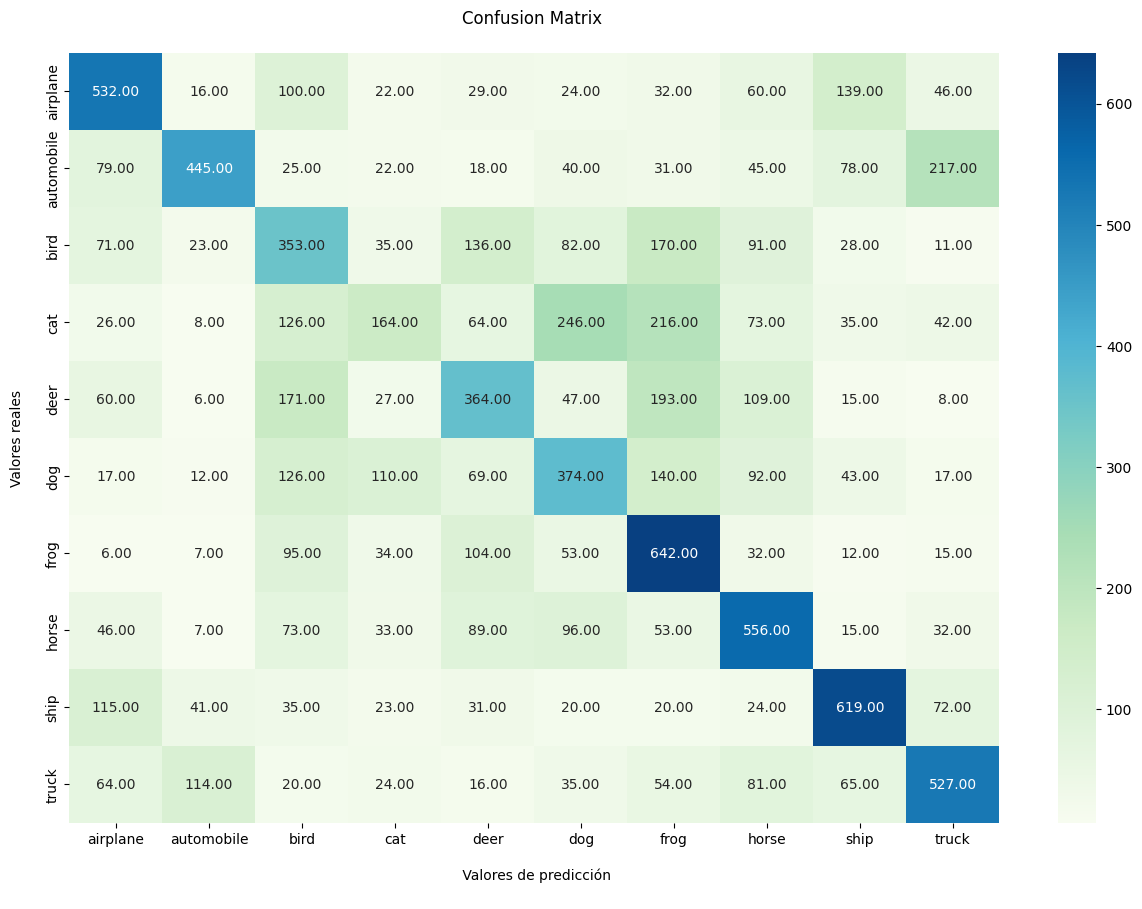

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib import*
from matplotlib.cm import register_cmap
import matplotlib.pyplot as plt

MAE=metrics.mean_absolute_error(y_test2, y_pred)
MSE=metrics.mean_squared_error(y_test2, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test2, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE)

accuracyModeloBase=str(accuracy_score(y_test2,y_pred))
print('Accuracy: ' + accuracyModeloOptimizado)

precision=precision_score(y_test2,y_pred, average='weighted')#average one of [None, 'micro', 'macro', 'weighted']
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_test2,y_pred, average='weighted')
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_test2,y_pred, average='weighted')
f1=str(round(f1, 4))
print('F1:',f1)


plt.figure(figsize=(15,10))
fx=sns.heatmap(confusion_matrix(y_test2,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Valores de predicción\n')
fx.set_ylabel('Valores reales\n');
fx.xaxis.set_ticklabels(_load_label_names())
fx.yaxis.set_ticklabels(_load_label_names())
plt.show()

*Comparación de modelos*

In [ ]:
modeloBase=cargarNN('modeloRedNeuronalBase')
modeloOptimizado=cargarNN('modeloRedNeuronalOptimizada')

accuracyModeloBase=float(str(accuracyModeloBase))
accuracyModeloOptimizado=float(str(accuracyModeloOptimizado))
print('Accuracy Modelo Base: ',accuracyModeloBase)
print('Accuracy Modelo Optimizado: ',accuracyModeloOptimizado)
mejora=float(str(round((accuracyModeloOptimizado-accuracyModeloBase)*100,4)))

print('Mejora en %:',mejora)

Red Neuronal Cargada desde Archivo
Red Neuronal Cargada desde Archivo
Accuracy Modelo Base:  0.4576
Accuracy Modelo Optimizado:  0.45964
Mejora en %: 0.204


**1.5	Desarrollar una función propia de predicción para una nueva imagen que puede venir en UNA de las siguientes formas: b.	Una imagen nueva indicando el PATH**

*Predicción de nuevos samples (nuevos imagenes)*

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


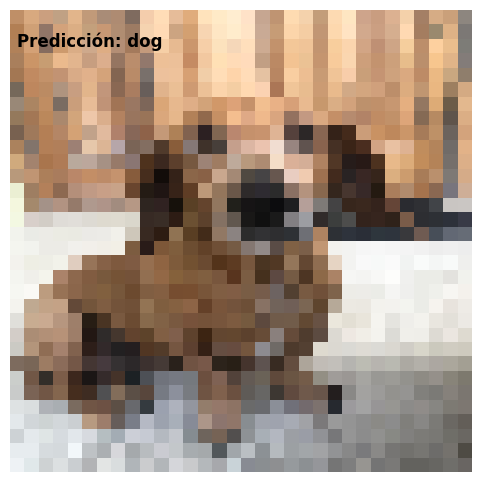

Predicción final: dog (Valor: 1.0000)


In [ ]:
import cv2
image_path = '/content/mia.jpg'  # Reemplaza 'ruta_de_tu_imagen.jpg' con la ruta correcta

# Cargar la imagen desde tu computadora
image = cv2.imread(image_path)

# Asegurarse de que la imagen se haya cargado correctamente
if image is not None:
    # Preprocesar la imagen
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB si es necesario
    image = cv2.resize(image, (32, 32))  # Cambiar el tamaño de la imagen si es necesario
    image = image.reshape(1, -1)

    # Realizar la predicción
    predictions = modeloOptimizado.predict(image)
    predictions = predictions.flatten()

    # Obtener el nombre de las etiquetas
    label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Obtener la clase con el valor más alto como predicción final
    predicted_class_index = predictions.argmax()
    predicted_class_name = label_names[predicted_class_index]
    predicted_class_value = predictions[predicted_class_index]

    # Mostrar la imagen con el resultado en la parte superior
    fig = plt.figure(figsize=(6, 6))
    plt.text(0, 1.05, 'Predicción: {}'.format(predicted_class_name), fontsize=12, weight='bold', ha='left', va='top')
    plt.imshow(image.reshape(32, 32, 3))
    plt.axis('off')
    plt.show()

    print('Predicción final: {} (Valor: {:.4f})'.format(predicted_class_name, predicted_class_value))
else:
    print('No se pudo cargar la imagen desde la ruta especificada.')

**1.6	Conclusiones**
- Primeramente describimos el dataset en el cual hablamos de las diez categorias que tiene (airplane : 0 automobile : 1 bird : 2 cat : 3 deer : 4 dog : 5 frog : 6 horse : 7 ship : 8 truck : 9), ademas recordar que este dataset tiene 60000 imagenes, 50000 para train y 10000 para test, además analizamos sus dimensiones y todos los valores relevantes del dataset.
- En la parte del entrenamiento de la red neuronal base lo que hicimos fue realizar un modelo de 3 capas con neuronas de 32, 64 y 10 neuronas respectivamente, comenzamos con una estructura simple y con los epochs a 10, esto para lograr un mejor resultado del entrenamiento. Asi es como conseguimnos una accurracy del 0.39.
- Luego mostramos los resultados de calidad que viene a ser buenos (Accuracy: 0.4256, Precision:  0.4215, Recall:  0.4256, F1: 0.4194). Adenas de que mostramos la matriz de confusion donde pudimos ver que la mayoria de aciertos en cuanto a reales y prediccion son con los airplane, frog y ship.
-Despues con esos fundamentos, logramos pasar a la optimizacion del modelo de la red neuronal (fine tuning); seguimos con el Paso 1. Parámetros de compilación: batcha size, cantidad de epochs, optimizador, con la ayuda del GridSearch, conseguimnos realizar una gran cantidad de comparacion donde llegamos a la conclusion de que con  batch_size: 300, 'epochs': 20, 'optimizer': 'Adam' llegamos una accurracy del 0.38.
- Aplicando los mejores parametros de compilacion que recien conseguimos a concer pasamod son el Paso 2. Densidad de las capas de neuronas y regularización de Dropout, donde nos muestra que con 'model__dr': 0, 'model__l1': 64, 'model__l2': 64 tenemos un accuracy de 0.42.
-Realizamos comparaciones de ambos modelos y, con la ayuda de tablas y mapas de calor, llegamos a la conclusion que el modelo Optimizado, que junta todos nuestros nuevos valores a los parametros mas revelantes lo usamos para ajustar nuestro nuevo modelo optimizado llegamos a alcanzar un nuevo accuracy de 0.45, tiene una mejora del 0.204%, lo cual puede parecer leve por el momento pero en si demuestra la eficacia de los procedimientos de la optimizacion.
- Por ultimo logramos hacer predicciones, utilizando el modelo Optimizado, de imagenes sacada de una ruta en donde usamos una foto de una perrita y la prediccion acertó con que era un perro.
- A lo largo de la practica llegamos tambien a conclusiones tambien en como se podria mejor estos procesos de optimizacion de una red neuronal, tratar de trabajar con un batch de imagenes primero para que podamos realizar las ejecuciones y pruebas de manera mas agil, diseñar un modelo con pocas capas y que sea simple para que el gridsearch no comsuma tantos recursos ni tanto tiempo.

**1.7	Referencias**
- CIFAR-10 and CIFAR-100 datasets. (s/f). Toronto.edu. Recuperado de https://www.cs.toronto.edu/~kriz/cifar.html
- OpenCV: OpenCV modules. (s. f.). Recuperado de https://docs.opencv.org/4.x/
- Activation parameter not working in GridSearch. (2022). stackoverflow. Recuperado de https://stackoverflow.com/questions/70250928/activation-parameter-not-working-in-gridsearch#comment126992357_70250928